# Mobile App Store ( 7200 apps)
    Dados estão disponíveis aqui: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/data
    
### Sumário
    1 - Analisando a estrutura dos dados
        1.1 Dados Nulos
    2 - Análise com gráfico

In [39]:
#  Seção de imports

# Para Manipular os dados
import pandas as pd

# Para Gráficos
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("datasets_30069_39285_AppleStore.csv")

### Analisando a estrutura dos dados
    Nessa primeira abordagem é importante sabermos como os dados estão organizados
    para termos ideia de como lidar com eles da maneira que precisamos.

In [6]:
# .head() nos mostra as 5 primeiras linhas da tabela
'''
    Nessa primeira olhada já podemos notar a coluna ['Unnamed: 0']. Provavelmente
    ela não será útil, aparentemente ela era o index da tabela anterior, mas como 
    já temos um, iremos removê-la mais a frente

'''

df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [8]:
'''
    .head() também nos mostra os nomes das columas, mas como cada DataFrame é diferente, 
    existe aqueles muito grandes (com mais de 50, 100 colunas) para obtermos respotas apenas olhando.
    
    Utilizando .columns é possível ver o nome das colunas existentes em uma área mínima 
'''

df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [9]:
# Quantidade de linhas e de colunas

df.shape

(7197, 17)

In [11]:
# Informações sobre as colunas (como se há dados nulos e o  tipo de dado)

'''
    Em .shape vemos que há 7197 linhas, logo, ao ver que todas as colunas têm 7197 non-null
    (ou seja, dados não nulos), sabemos que não nenhum famoso NaN nessa tabela
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


### 1.1 Dados Nulos

In [27]:
# Visualização de nulos 
# Obs: isna() faz o mesmo que isnull()
#      .head() apenas para não mostar a tabela toda
'''
    Como sabemos, essa tabela é muito grande para usarmos .isna() dessa maneira
    para encontrar dados nulos (que já sabemos que não há). Por isso, um dos modos
    de aproveitarmos essa funcionalidade mais eficientemente é...
'''

df.isna().head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
'''
   usá-la junto com o .sum(), assim, conseguimos saber a soma/quantidade de 
   'missing values'/dados faltantes em cada coluna. E agora confirmamos que não há 
   nenhum NaN
'''
df.isnull().sum()

id                  0
track_name          0
size_bytes          0
price               0
rating_count_tot    0
user_rating         0
user_rating_ver     0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

Há mais para aprender sobre NaN, mas esse aprofunamento é um assunto para outra postagem

In [13]:
# Mostra algumas medidas estatísticas,
'''
    Tendo conhecimentos de estatística essa função nos ajuda a rapidamente
    entender certas características dos dados
'''

df.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [21]:
# Removendo as colunas que não utilizaremos
'''
    axis=1   significa 'alterar colunas' / também pode ser escrito como axis='columns'
    axis=0   quer dizer 'alterar linhas' / também pode ser escrito como axis='index'
    
    inplace=True faz a alteração diretamente na variável df
    Sem ele (por padrão é False) a mudança não é permanente já que é feita em uma cópia.
    Além do inplace = True outra maneira de mudar permanentemente é usando a sintax: 
    df = df.drop()
'''

df.drop(columns=['Unnamed: 0', 'currency', 'ver'], axis=1, inplace=True)

df = df.drop(columns='rating_count_ver')

# A coluna ['id'] não será removida na variável df, mas em uma cópia
# Logo você ainda a verá na tabela
df.drop(columns='id')

df

,id,track_name,size_bytes,price,rating_count_tot,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,4.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,3.5,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4.5,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,4.5,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,0.00,985920,4.5,5.0,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,0.00,142,4.5,4.5,4+,Games,38,5,1,1
7193,1187682390,VR Roller-Coaster,120760320,0.00,30,4.5,4.5,4+,Games,38,0,1,1
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,1.99,15,4.5,0.0,9+,Utilities,37,1,1,1
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,0.00,85,4.5,4.5,12+,Games,38,0,2,1


In [23]:
df.dtypes

id                    int64
track_name           object
size_bytes            int64
price               float64
rating_count_tot      int64
user_rating         float64
user_rating_ver     float64
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

### Análise com gráfico
    Eles são um bom auxílio no quesito "ver para crer" kkkk.
    Na verdade, uma análise visual também é uma análise, e eles nos ajudam nisso.
    
    O ponto é: em um nível mais avançado, após abordar os dados profissionalmente
    e aplicar modelos de machine learning, os gráficos também são utilizados para
    demostrar os resultados da análise. Assim sendo, esses gráficos devem ser 
    criados pensando-se no público que os verá e não com o pensamento estatístico 
    de "o gráfico de barras é melhor para observar varíaveis qualitativas"
    
    Tendo isso em mente, vamos focar no básico

In [32]:
'''
    Primeiro, criamos uma variável para utilizar como objeto do gráfico
    Ela representará a soma    ---->    .value_counts() 
    dos tipos de gêneros      ---->    df['prime_genre']
    
    
    em outras palavra, existem 3862 linhas na coluna ['prime_genre']
    onde o gênero escrito é 'Games'
    535 valores 'Entertainment'
    453 'Education'
    e assim por diante
'''
genre_counts = df['prime_genre'].value_counts()
genre_counts

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

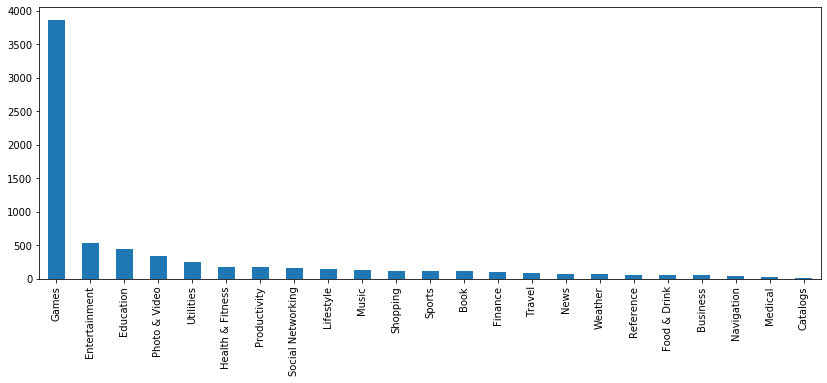

In [40]:
# 'Plotando' com plot.bar() ( bar = gráfico de barras)
# Obs figsize é um parâmetro da função onde decidimos o tamanho da figura
'''
    Temos uma forma visual das informações acima
'''

genre_counts.plot.bar(figsize=(14,5))

# Por hora: plt.show() faz apenas o gráfico aparecer, não entraremos nesse tema agora
plt.show()

Como você percebeu, tivemos que manipular os dados (nesse caso, de maneira bem simples)
para conseguir criar o gráfico, por isso é tão importante praticar e aprender como 
lidar com os dados.

Enfim, ainda há muito a ser aprender, esse foi apenas um resumo de uma das práticas que me ajudaram a 
entender e aprender o assunto.